# 0.) Import and Clean data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [10]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [11]:
kmeans = KMeans(n_clusters= 3
                , random_state=42).fit(X_scaled)

# 2.) Pick two features to visualize across

In [12]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

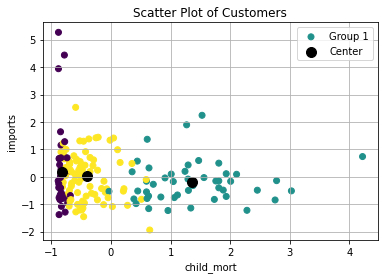

In [13]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [14]:
WCSSs = []
Ks = range(1, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init="random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

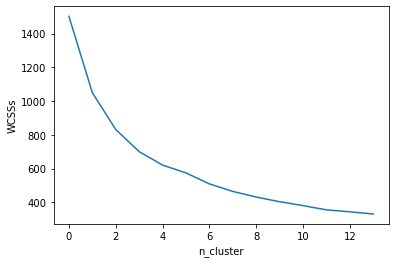

In [15]:
plt.plot(WCSSs)
plt.xlabel("n_cluster")
plt.ylabel("WCSSs")
plt.show()

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

With the help of elbow criteria, we choose $n\_cluster=2$, because it looks most like a pivot point. As n increase, WCSSs doesn't decrease significantly.

In [16]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=30, init="random").fit(X_scaled)

In [17]:
kmeans

KMeans(init='random', n_clusters=2, n_init=30)

In [18]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds, X, names], axis=1)

In [19]:
output

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Vanuatu
163,1,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Venezuela
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Vietnam
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Yemen


In [20]:
print("Cluster1:")
list(output[output[0]==0]["country"])

Cluster1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [21]:
print("Cluster2:")
list(output[output[0]==1]["country"])

Cluster2:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

# 6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [22]:
Q6DF = pd.concat([preds, X], axis = 1)
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [23]:
Q6DF.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Q7.) Write an observation about the descriptive statistics.

Rich country with higher income and gdp's people tends to have less children and lower inflation.

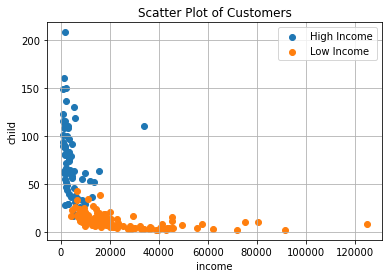

In [24]:
plt.scatter(Q6DF[Q6DF[0]==0].income, Q6DF[Q6DF[0]==0].child_mort)
plt.scatter(Q6DF[Q6DF[0]==1].income, Q6DF[Q6DF[0]==1].child_mort)
plt.xlabel("income")
plt.ylabel("child")
plt.title('Scatter Plot of Customers')
plt.legend(["High Income", "Low Income"])
plt.grid()
plt.show()

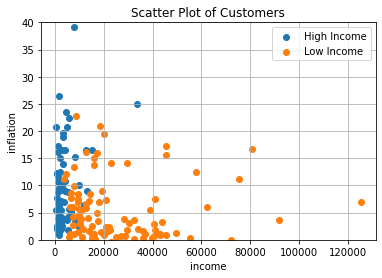

In [25]:
import seaborn as sns
plt.scatter(Q6DF[Q6DF[0]==0].income, Q6DF[Q6DF[0]==0].inflation)
plt.scatter(Q6DF[Q6DF[0]==1].income, Q6DF[Q6DF[0]==1].inflation)
plt.xlabel("income")
plt.ylabel("inflation")
plt.ylim((0, 40))
plt.title('Scatter Plot of Customers')
plt.legend(["High Income", "Low Income"])
plt.grid()
plt.show()